# Effectiveness of macro-trading

In [26]:
from adata.stock import Stock
from jinja2.lexer import TOKEN_LTEQ
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from database import Database
from crawler import Crawler
from api_source import TiingoApiSource, AshareApiSource, FederalFinanceAPI, BureauOfLaborStatisticsAPI
from mock_trade import MockTrade, Trade
from datetime import datetime
from backend import Backend
from frontend import Frontend
from cert import TiingoKey
from main import *
from backend import Backend
import matplotlib.pyplot as plt
from logging_config import set_quiet_mode

set_quiet_mode()


### Scenario 1: [2007-2025] mild macro trading strategy with optimal timing

Trading Strategy:
- Hold up to 20% TLT to hedge against asset inflation slow down. Sell at optimal timing.
- Hold up to 10% DBC (max double) to hedge against high macro-inflation. Sell at optimal timing.
- Hold US equity as the main holding.
- Hold 10% IAU

Learnings:
- SPY does not balance out macro-economic cycles, and is with high volatility. **Portfolio** out performs SPY by 2.94% yearly (670% vs 365% in 18 years).
- BRK-B seems to already be covering some factors to mitigate the macro-economic cycles volatility already, and is . "Portfolio" out performs BRK-B by only 0.83% yearly (670% vs 583% in 18 years). Note that **Portfolio** is operating on ideal timeliness.

Style 'seaborn-v0_8' not available, using default


Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    SPY      3536     $141.37    $499884.30   $500115.70   SPY:3536       
2   2007-01-03   BUY    TLT      3368     $89.07     $299987.76   $200127.94   TLT:3368       
3   2007-01-03   BUY    IAU      8025     $12.46     $99991.50    $100136.44   IAU:8025       
4   2007-01-03   BUY    DBC      4201     $23.80     $99983.38    $153.06      DBC:4201       
         Adjusted to sell 4201 shares instead
5   2008-06-25   SELL   DBC      4201     $44.01     $184886.01   $185039.07   DBC:0           (CLIPPED)
         Adjusted to buy 1443 shares instead ($185035.88)
6   2008-06-26   BUY  

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:221: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_hex != orange_hex and c not in orange_variants:


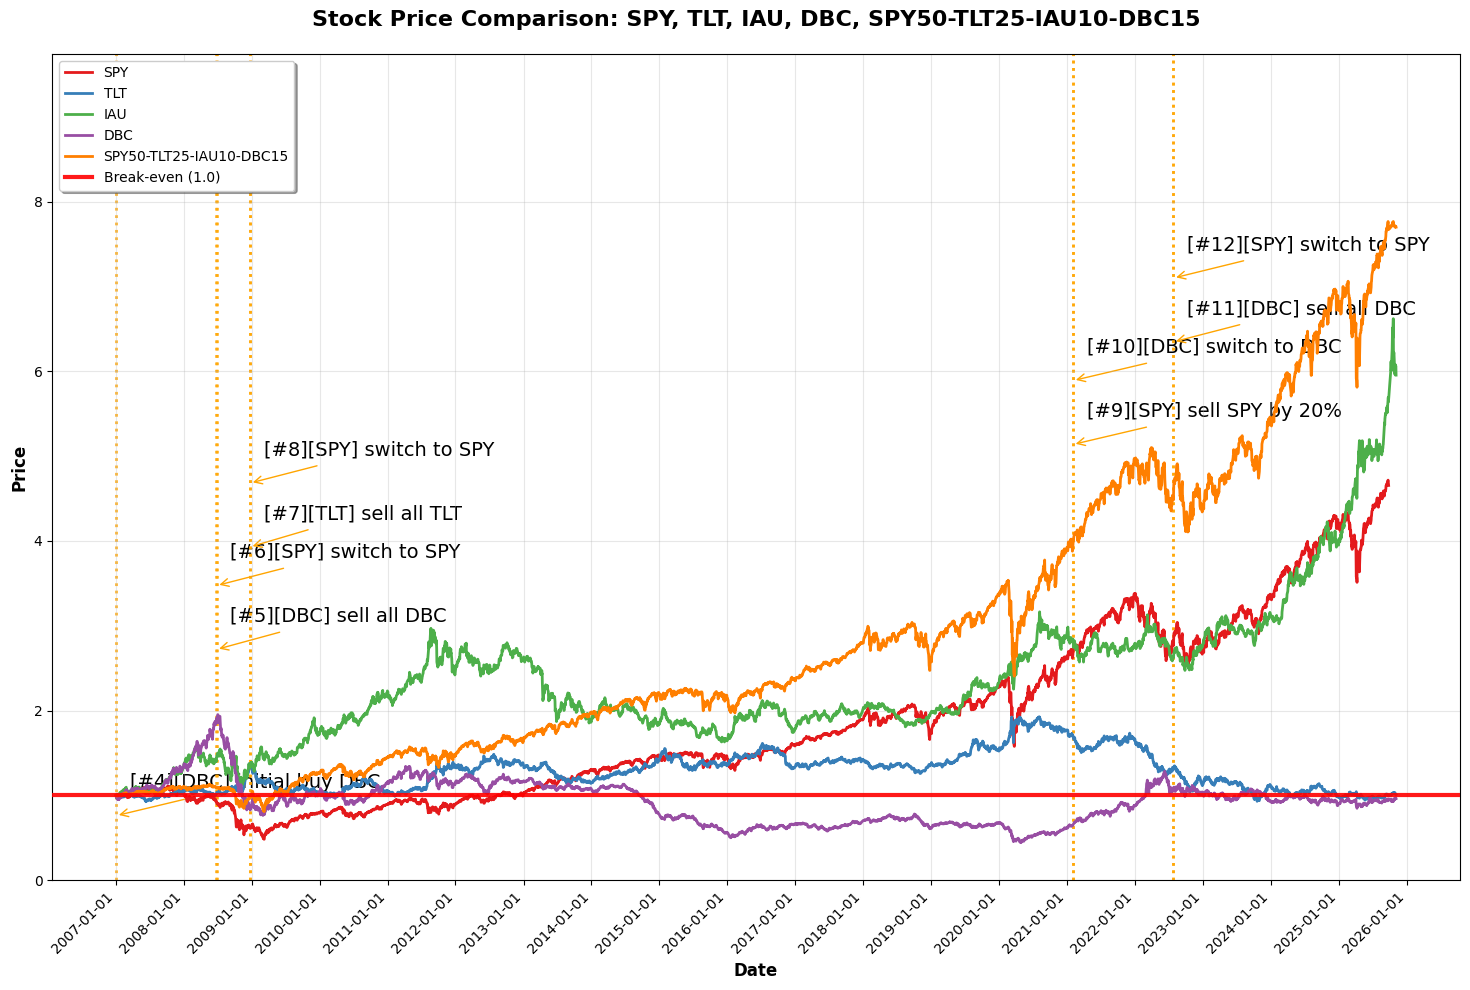

In [7]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='IAU', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY50-TLT25-IAU10-DBC15",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=500000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=300000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=3, symbol="IAU", cash_amount=100000, date=START_DATE, desc=f"initial buy IAU"),
                Trade(index=4, symbol="DBC", cash_amount=100000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-06-25', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-06-26', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-12-22', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-12-23', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-02-01', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-02-02', desc="switch to DBC"),
                Trade(index=11, symbol="DBC", cash_amount=-INF, date='2022-07-25', desc="sell all DBC"),
                Trade(index=12, symbol=EQUITY, cash_amount=INF, date='2022-07-26', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='SPY',
    start_date=START_DATE, end_date=END_DATE
)


Style 'seaborn-v0_8' not available, using default


Using MockTrade for portfolio simulation...
Calculated initial investment: $1000000.00
Portfolio initialized with $1000000.00 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2007-01-03   BUY    SPY      3536     $141.37    $499884.30   $500115.70   SPY:3536       
2   2007-01-03   BUY    TLT      3368     $89.07     $299987.76   $200127.94   TLT:3368       
3   2007-01-03   BUY    IAU      8025     $12.46     $99991.50    $100136.44   IAU:8025       
4   2007-01-03   BUY    DBC      4201     $23.80     $99983.38    $153.06      DBC:4201       
         Adjusted to sell 4201 shares instead
5   2008-06-25   SELL   DBC      4201     $44.01     $184886.01   $185039.07   DBC:0           (CLIPPED)
         Adjusted to buy 1443 shares instead ($185035.88)
6   2008-06-26   BUY  

/Users/Joel/PycharmProjects/StockAnalysis/frontend.py:553: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  available_colors.append(c)



📊 Summary Statistics:
--------------------------------------------------
SPY50-TLT25-IAU10-DBC15: Latest:    7.701 | Min:    0.808 | Max:    7.768 | Avg:    2.862
BRK-B (Benchmark): Latest:    6.693 | Min:    0.631 | Max:    7.409 | Avg:    2.567
   SPY: Latest:    4.655 | Min:    0.482 | Max:    4.717 | Avg:    1.846
   TLT: Latest:    1.010 | Min:    0.925 | Max:    1.926 | Avg:    1.279
   IAU: Latest:    5.956 | Min:    0.966 | Max:    6.621 | Avg:    2.332
   DBC: Latest:    0.962 | Min:    0.441 | Max:    1.951 | Avg:    0.925
💡 Hover over the lines to see detailed information
💡 Use plt.show() to display the plot when ready


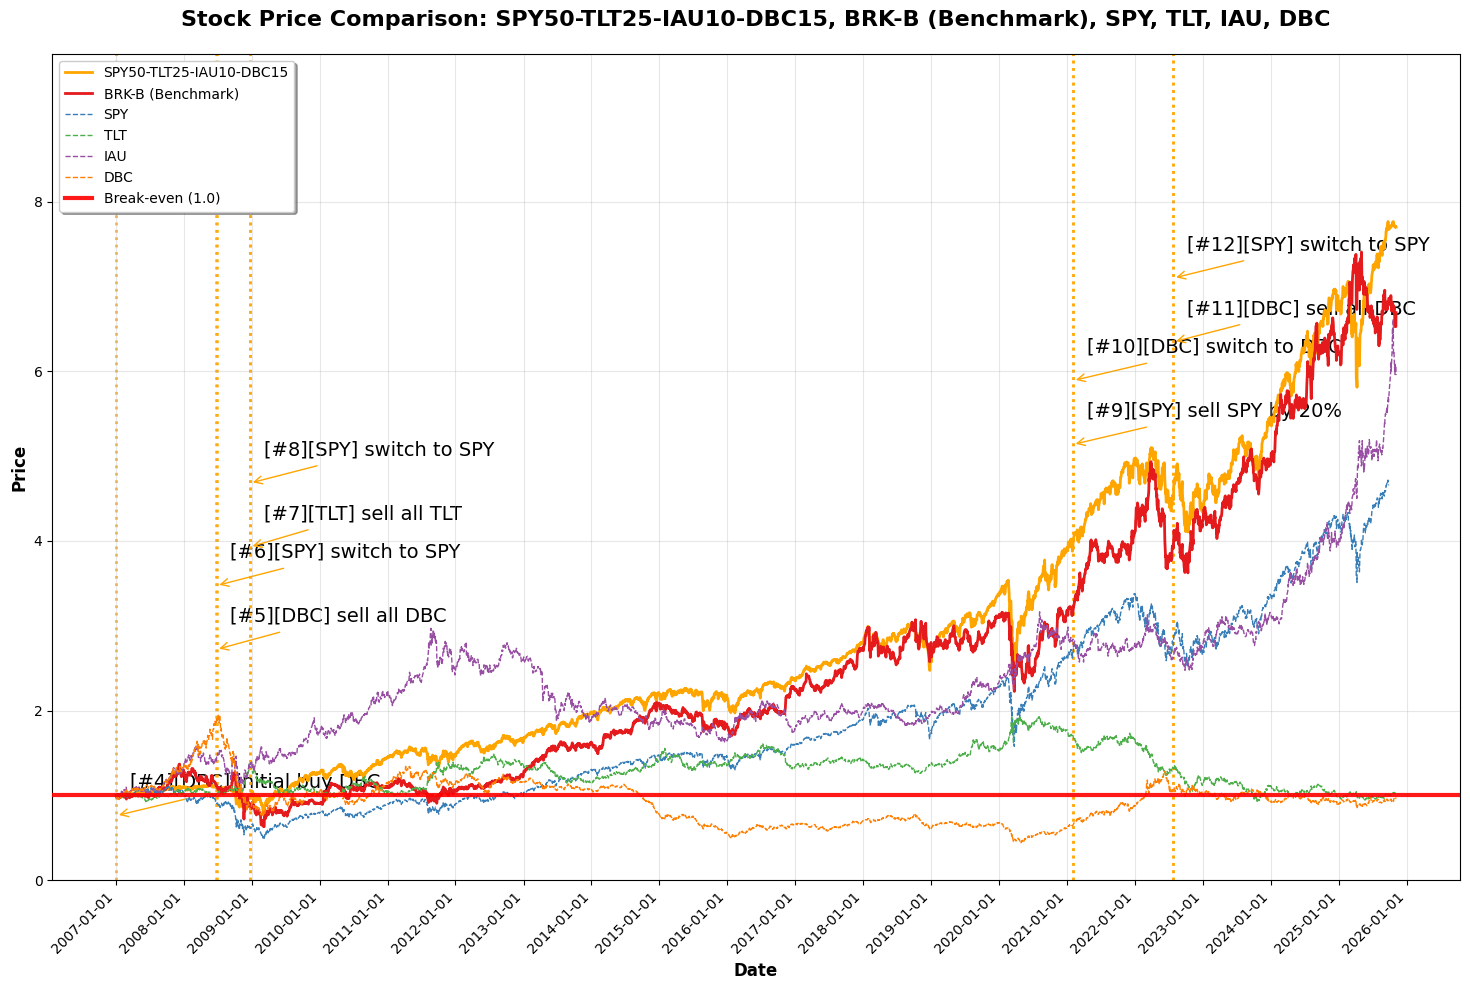

In [29]:
START_DATE = "2007-01-03"
END_DATE = "2025-11-04"
EQUITY = "SPY"

dfs = plot_prices(
    stocks=[
        StockConfig(symbol=EQUITY, normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='IAU', normalize=True),
        StockConfig(symbol='DBC', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY50-TLT25-IAU10-DBC15",
            trade_history=[
                Trade(index=1, symbol=EQUITY, cash_amount=500000, date=START_DATE, desc=f"initial buy {EQUITY}"),
                Trade(index=2, symbol="TLT", cash_amount=300000, date=START_DATE, desc=f"initial buy TLT"),
                Trade(index=3, symbol="IAU", cash_amount=100000, date=START_DATE, desc=f"initial buy IAU"),
                Trade(index=4, symbol="DBC", cash_amount=100000, date=START_DATE, desc=f"initial buy DBC"),
                Trade(index=5, symbol="DBC", cash_amount=-INF, date='2008-06-25', desc=f"sell all DBC"),
                Trade(index=6, symbol=EQUITY, cash_amount=INF, date='2008-06-26', desc=f"switch to {EQUITY}"),
                Trade(index=7, symbol="TLT", cash_amount=-INF, date='2008-12-22', desc=f"sell all TLT"),
                Trade(index=8, symbol=EQUITY, cash_amount=INF, date='2008-12-23', desc=f"switch to {EQUITY}"),
                Trade(index=9, symbol=EQUITY, percentage=-20, date='2021-02-01', desc=f"sell {EQUITY} by 20%"),
                Trade(index=10, symbol="DBC", cash_amount=INF, date='2021-02-02', desc="switch to DBC"),
                Trade(index=11, symbol="DBC", cash_amount=-INF, date='2022-07-25', desc="sell all DBC"),
                Trade(index=12, symbol=EQUITY, cash_amount=INF, date='2022-07-26', desc=f"switch to {EQUITY}"),
            ],
        ),
    ],
    benchmark='BRK-B',
    start_date=START_DATE, end_date=END_DATE
)


### Scenario 2: the usefulness of macro-trading: it beats SPY by 3.6%, beats BRKB by 1.5%